# AP Scores and Demographics: A Data Visualization Project

For my PWR essays, I studied extensively the roots of standardized testing, tracing it back to the early 20th century eugenics movement. Using this data set from Kaggle.com, I will attempt to verify professor Wayne Au's observation of the "zip code effect." As I wrote in a previous paper, "Most disturbing in his work, though, was a phenomenon he calls “the zip code effect”; Au states that in Berkeley High School in California, 'graduation rates, grade point averages, discipline rates, dropout rates, and standardized test scores could be relatively accurately predicted by a simple analysis of where in the city of Berkeley a particularly child lived.' This simple number, a number that helps the post office locate where to deliver mail, also provides the following: geographical demarcation of different neighborhoods, which generally have distinct racial and socioeconomic demographics."

I would like to see how accurately certain predictive models can guess an AP score given a demographic. In broader terms, I would like to see how demographics and AP scores relate.

David and Kaitlin -- Any suggestions for going about doing the above would be very helpful. I'd like to talk more on Thursday if possible about my direction with this.

In [1]:
from __future__ import print_function, division
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as opt

### Loading the Data:

In [2]:
examdata = pd.read_csv("exams_revised.csv")
examdata

,Exam Subject,Score,Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
0,ART HISTORY,5,1631.00,34,321.00,514.00,5,5,154.00,2704.00
1,ART HISTORY,4,3290.00,132,918.00,877.00,13,8,273.00,5587.00
2,ART HISTORY,3,3898.00,287,1347.00,992.00,19,10,307.00,6940.00
3,ART HISTORY,2,3211.00,450,1972.00,809.00,15,21,280.00,6868.00
4,ART HISTORY,1,942.00,307,1074.00,292.00,13,10,87.00,2771.00
5,ART HISTORY,All,12972.00,1210,5632.00,3484.00,65,54,1101.00,24870.00
6,ART HISTORY,Average,3.11,2.29,2.55,3.15,2.72,2.57,3.12,2.94
7,BIOLOGY,5,8585.00,153,788.00,4443.00,11,7,733.00,14894.00
8,BIOLOGY,4,29999.00,976,3966.00,10367.00,75,49,2139.00,48187.00
9,BIOLOGY,3,46377.00,3305,10511.00,13051.00,183,97,3477.00,77936.00


### Exploring the Calculus BC Dataframe

In [3]:
# As a test for the rest of the project, I will first look
# the calc BC data set and see what methods of analysis are appropriate.
calcBC = examdata.iloc[21:27, :]
calcBC

,Exam Subject,Score,Students (White),Students (Black),Students (Hispanic/Latino),Students (Asian),Students (American Indian/Alaska Native),Students (Native Hawaiian/Pacific Islander),Students (Two or More Races),All Students (2016)
21,CALCULUS BC,5,28740.0,764,3749.0,18354.0,47,44,2281.0,54660.0
22,CALCULUS BC,4,9814.0,403,1815.0,4577.0,26,26,720.0,17557.0
23,CALCULUS BC,3,10878.0,615,2411.0,4569.0,35,29,836.0,19589.0
24,CALCULUS BC,2,3453.0,274,981.0,1476.0,19,14,271.0,6558.0
25,CALCULUS BC,1,6612.0,913,3086.0,2917.0,35,18,592.0,14331.0
26,CALCULUS BC,All,59497.0,2969,12042.0,31893.0,162,131,4700.0,112695.0


In [42]:
# Plan: Make a histogram over the scores 
scores = np.array([1, 2, 3, 4, 5])
calcBC_white = examdata.iloc[21:26,2].astype('float64')
calcBC_black = examdata.iloc[21:26,3].astype('float64')
calcBC_latinx = examdata.iloc[21:26,4].astype('float64') 
calcBC_asian = examdata.iloc[21:26,5].astype('float64') 
calcBC_aian = examdata.iloc[21:26,6].astype('float64') 
calcBC_nhpi = examdata.iloc[21:26,7].astype('float64')
calcBC_2ormore = examdata.iloc[21:26,8].astype('float64') 

calc_classes = np.array([calcBC_white, calcBC_black, calcBC_latinx, calcBC_asian,
               calcBC_aian, calcBC_nhpi, calcBC_2ormore])

pandas.core.series.Series

In [62]:
# Function to created a stacked bar chart
def stacked_bar(xvalues, yvalues, legend_names, ax):
    bottomTracker = 0
    for i in range (0, len(yvalues)):
        print(yvalues[i])
        print(xvalues)
        ax.bar(xvalues, yvalues[i], label = legend_names[i], bottom = bottomTracker)
        bottomTracker += yvalues
    return ax

[28740.  9814. 10878.  3453.  6612.]
[1 2 3 4 5]
[764. 403. 615. 274. 913.]
[1 2 3 4 5]


TypeError: only size-1 arrays can be converted to Python scalars

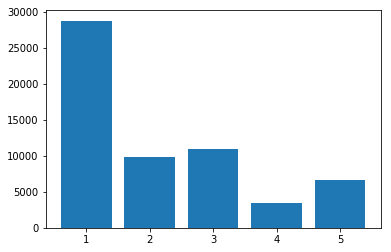

In [63]:
legend_names = np.array(["White", "Black", "Latinx", "Asian", "American Indian/Alaska Native", "Native Hawaiian/Pacific Islander", "2+ Races"])
fig, ax = plt.subplots(1,1)
ax = stacked_bar(scores, calc_classes, legend_names, ax)



#for i in range (0, len(calc_classes)):
   # plt.bar(scores, calc_classes[i], label = legend_names[i], bottom = bottomTracker)
   # bottomTracker += calc_classes[i]

plt.title("AP Calc BC Scores by Student-Identified Race")
plt.legend()
plt.show()

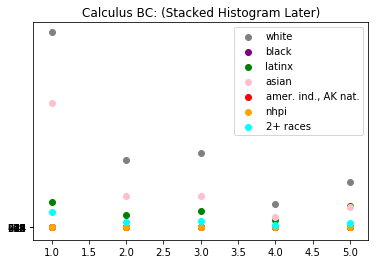

In [5]:
plt.title("Calculus BC: (Stacked Histogram Later)")
plt.scatter(scores, calcBC_white, color="grey", label = "white")
plt.scatter(scores, calcBC_black, color="purple", label = "black")
plt.scatter(scores, calcBC_latinx, color="green", label = "latinx")
plt.scatter(scores, calcBC_asian, color="pink", label = "asian")
plt.scatter(scores, calcBC_aian, color="red", label = "amer. ind., AK nat.")
plt.scatter(scores, calcBC_nhpi, color="orange", label = "nhpi")
plt.scatter(scores, calcBC_2ormore, color="cyan", label = "2+ races")
plt.legend()
plt.show()

# I want to convert these all to frequency and then create a stacked histogram. However, some of the series seem
# to be series of strings, making things difficult. This plot will be edited in the future.

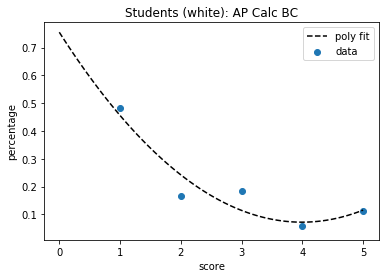

Poly fit params:  [ 0.04283649 -0.34209384  0.75508009]


In [6]:
# Converting to frequency:
calcBC_white_f = calcBC_white / 59497.0
plt.title("Students (white): AP Calc BC")
plt.xlabel("score")
plt.ylabel("percentage")
plt.scatter(scores, calcBC_white_f, label = "data")

# Preliminary polynomial fit
# More advanced fits to come
def poly(x, a, b, c):
    return a*x**2 + b*x + c

params, cov = opt.curve_fit(poly, scores, calcBC_white_f)
xarr = np.linspace(0,5, num=100)
plt.plot(xarr, poly(xarr, *params), "k--", label="poly fit")
plt.legend()
plt.show()
print("Poly fit params: ", params)

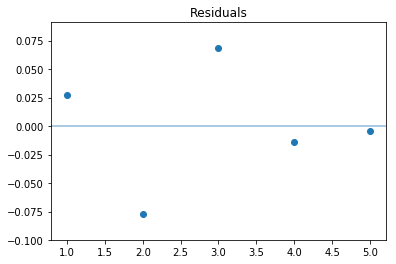

In [7]:
# Residual plots for the above calculation:
res = calcBC_white_f - poly(scores, *params)
plt.scatter(scores, res)
plt.title("Residuals")
plt.axhline(0, 0, 1, alpha = 0.5)
plt.show()

I need to look into ways to approach this sort of dataset. If you have any suggestions, please let me know. The above polynomial fit seems a little naive for discrete bins like these.